# LSA Exercise

The purpose of this exercise is to use LSA in order to run unsupervised topic extraction on texts and compare the results to the target variable. We are not going to use the target variable to train a model but only to assess if the topics found by LSA are similar to the classes that would have been used for supervised classification.

1. Let's begin and import the libraries we will be using

In [15]:
# Install spacy quietly
!pip install spacy -q

In [5]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

2. Load the 20 news dataset into an object news

In [8]:
news = fetch_20newsgroups()

3. Display the data description using the DESCR key

In [115]:
df = pd.DataFrame({"text": news.data, "target": news.target})
df.iloc[0].text

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [11]:
print(news.get("DESCR"))

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

4. Store the object news.data in a DataFrame and call the column text. Extract a sample of 5000 rows to begin with. Add the target variable to this dataframe in order to run analysis later.

In [102]:
df = pd.DataFrame({"text": news.data, "target": news.target})
df.head()

,text,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


5. Create a column text_clean containing only alphanumerical characters and change all characters to lowercase. Also only keep the tex that is after the string "Subject:"

In [42]:
!python -m spacy download en_core_web_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [43]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [68]:
import re
df["text_clean"] = df.text.str.extract(".*Subject:(.*)", re.DOTALL)
df["text_clean"] = df.text_clean.str.replace('\W', ' ')
df["text_clean"] = df.text_clean.str.lower()

In [69]:
df.head()

,text,target,text_clean
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,what car is this nntp posting host rac3 wa...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,si clock poll final call summary final cal...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,pb questions organization purdue universi...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,re weitek p9000 organization harris compu...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,re shuttle launch question organization smi...


6. Create an object nlp with ```en_core_web_sm.load``` 

7. Tokenize the cleaned sentences and remove english stopwords

,text,target,text_clean,text_tokenized
11042,From: russ@deakin.OZ.AU (Russ Sharp)\nSubject:...,2,character missing in ttforganization deakin un...,"[character, miss, ttforganization, deakin, uni..."
2094,From: claice@rintintin.Colorado.EDU (Farmer Te...,14,re space debrisnntppostinghost rintintincolora...,"[space, debrisnntppostinghost, rintintincolora..."
9397,From: tod@cco.caltech.edu (Tod Edward Kurt)\nS...,12,data pods 10248b for hp logic analyzer 1615aor...,"[data, pods, 10248b, hp, logic, analyzer, 1615..."
1823,From: dwf@kepler.unh.edu (Dennis W Fitanides)\...,6,2400 baud external modem 25 mintorganization u...,"[2400, baud, external, modem, 25, mintorganiza..."
6992,Subject: Re: If You Feed Armenians Dirt -- You...,17,re if you feed armenians dirt you will bite d...,"[feed, armenian, dirt, , bite, dustfrom, sene..."


8. Detokenize the tokenized sentences and store them in an ```nlp_ready``` column

,text,target,text_clean,text_tokenized,nlp_ready
11042,From: russ@deakin.OZ.AU (Russ Sharp)\nSubject:...,2,character missing in ttforganization deakin un...,"[character, miss, ttforganization, deakin, uni...",character miss ttforganization deakin universi...
2094,From: claice@rintintin.Colorado.EDU (Farmer Te...,14,re space debrisnntppostinghost rintintincolora...,"[space, debrisnntppostinghost, rintintincolora...",space debrisnntppostinghost rintintincoloradoe...
9397,From: tod@cco.caltech.edu (Tod Edward Kurt)\nS...,12,data pods 10248b for hp logic analyzer 1615aor...,"[data, pods, 10248b, hp, logic, analyzer, 1615...",data pods 10248b hp logic analyzer 1615aorgani...
1823,From: dwf@kepler.unh.edu (Dennis W Fitanides)\...,6,2400 baud external modem 25 mintorganization u...,"[2400, baud, external, modem, 25, mintorganiza...",2400 baud external modem 25 mintorganization u...
6992,Subject: Re: If You Feed Armenians Dirt -- You...,17,re if you feed armenians dirt you will bite d...,"[feed, armenian, dirt, , bite, dustfrom, sene...",feed armenian dirt bite dustfrom senelvuseva...


9. Use sklearn to calculate the tf-idf

<5000x122335 sparse matrix of type '<class 'numpy.float64'>'
	with 468961 stored elements in Compressed Sparse Row format>

10. Use the truncatedSVD model in order to create a topic model with 20 different topics

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,text
11042,0.059796,-0.049275,-0.027429,-0.011029,0.015278,-0.051298,-0.008465,0.007173,0.024146,-0.019902,...,-0.002197,-0.028354,-0.011733,-0.011084,-0.025105,-0.001777,-0.012112,-0.025110,0.012650,character miss ttforganization deakin universi...
2094,0.047447,-0.007720,-0.000981,-0.010204,-0.016786,-0.007090,-0.026708,0.048652,0.037571,-0.033235,...,0.005677,-0.038925,-0.035315,0.025110,-0.043303,0.004780,-0.043807,-0.035955,-0.032218,space debrisnntppostinghost rintintincoloradoe...
9397,0.050893,-0.016279,-0.002374,0.003018,0.000430,0.011689,-0.026367,0.004265,0.006469,0.008385,...,0.003984,0.006752,-0.009503,-0.007359,-0.003908,-0.016694,0.006480,0.001838,0.028512,data pods 10248b hp logic analyzer 1615aorgani...
1823,0.033731,-0.034864,0.000572,-0.013065,-0.008798,0.016066,-0.009527,0.026115,0.031090,-0.010043,...,0.022439,-0.004001,-0.018475,0.005934,0.005052,-0.013206,0.026601,-0.008359,0.036704,2400 baud external modem 25 mintorganization u...
6992,0.066340,0.035880,0.031195,0.025923,-0.102385,-0.033040,0.078339,0.094443,-0.004613,0.017723,...,-0.026586,-0.011320,0.022897,0.031743,-0.008505,0.007284,0.015290,0.043379,0.016638,feed armenian dirt bite dustfrom senelvuseva...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.053327,0.022412,-0.005576,0.011897,-0.032288,-0.012663,0.015509,0.009961,-0.003592,0.000423,...,0.010218,0.007186,0.002490,0.008903,0.004490,-0.008386,-0.010632,-0.009088,-0.007076,abortionnewssoftware ibm os2 pm rn nr2 v017i o...
5739,0.092468,-0.017202,-0.036100,-0.024283,0.024511,-0.041110,-0.013341,0.006878,-0.003747,-0.022665,...,-0.003145,-0.015829,-0.015615,-0.009323,0.005728,-0.025984,0.011478,0.040798,-0.003604,tiff appsoft draw gif conversionorganization...
9761,0.036889,-0.018754,-0.000569,0.019294,0.001861,0.000743,-0.000507,-0.012418,0.018564,0.036706,...,0.019164,-0.026200,-0.001729,-0.004057,-0.009186,-0.000821,0.003693,-0.008190,0.004848,waco militia assembleskeyword salute themorgan...
1518,0.074937,-0.036612,-0.016300,0.013150,0.015420,-0.018824,-0.034363,0.020405,0.016097,0.000684,...,-0.005051,-0.011041,-0.016218,-0.015011,0.010007,-0.022158,-0.016681,0.023264,0.004684,idea vectorsorganization capricciosoxnewsreade...


11. Assign each document to the topic it is the most linked to :

0     3561
2      302
3      141
18     133
5      119
1      102
8       76
10      74
9       71
19      64
16      55
15      52
7       52
12      44
17      42
11      39
13      38
14      19
6       15
4        1
Name: class_pred, dtype: int64

12. Add the target variable to thetopic model dataframe and print the confusion matrix for the topic against the target variable :

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,text,class_pred,target
11042,0.059796,-0.049275,-0.027429,-0.011029,0.015278,-0.051298,-0.008465,0.007173,0.024146,-0.019902,...,-0.011733,-0.011084,-0.025105,-0.001777,-0.012112,-0.025110,0.012650,character miss ttforganization deakin universi...,0,2
2094,0.047447,-0.007720,-0.000981,-0.010204,-0.016786,-0.007090,-0.026708,0.048652,0.037571,-0.033235,...,-0.035315,0.025110,-0.043303,0.004780,-0.043807,-0.035955,-0.032218,space debrisnntppostinghost rintintincoloradoe...,7,14
9397,0.050893,-0.016279,-0.002374,0.003018,0.000430,0.011689,-0.026367,0.004265,0.006469,0.008385,...,-0.009503,-0.007359,-0.003908,-0.016694,0.006480,0.001838,0.028512,data pods 10248b hp logic analyzer 1615aorgani...,0,12
1823,0.033731,-0.034864,0.000572,-0.013065,-0.008798,0.016066,-0.009527,0.026115,0.031090,-0.010043,...,-0.018475,0.005934,0.005052,-0.013206,0.026601,-0.008359,0.036704,2400 baud external modem 25 mintorganization u...,19,6
6992,0.066340,0.035880,0.031195,0.025923,-0.102385,-0.033040,0.078339,0.094443,-0.004613,0.017723,...,0.022897,0.031743,-0.008505,0.007284,0.015290,0.043379,0.016638,feed armenian dirt bite dustfrom senelvuseva...,7,17


Text(159.0, 0.5, 'True label')

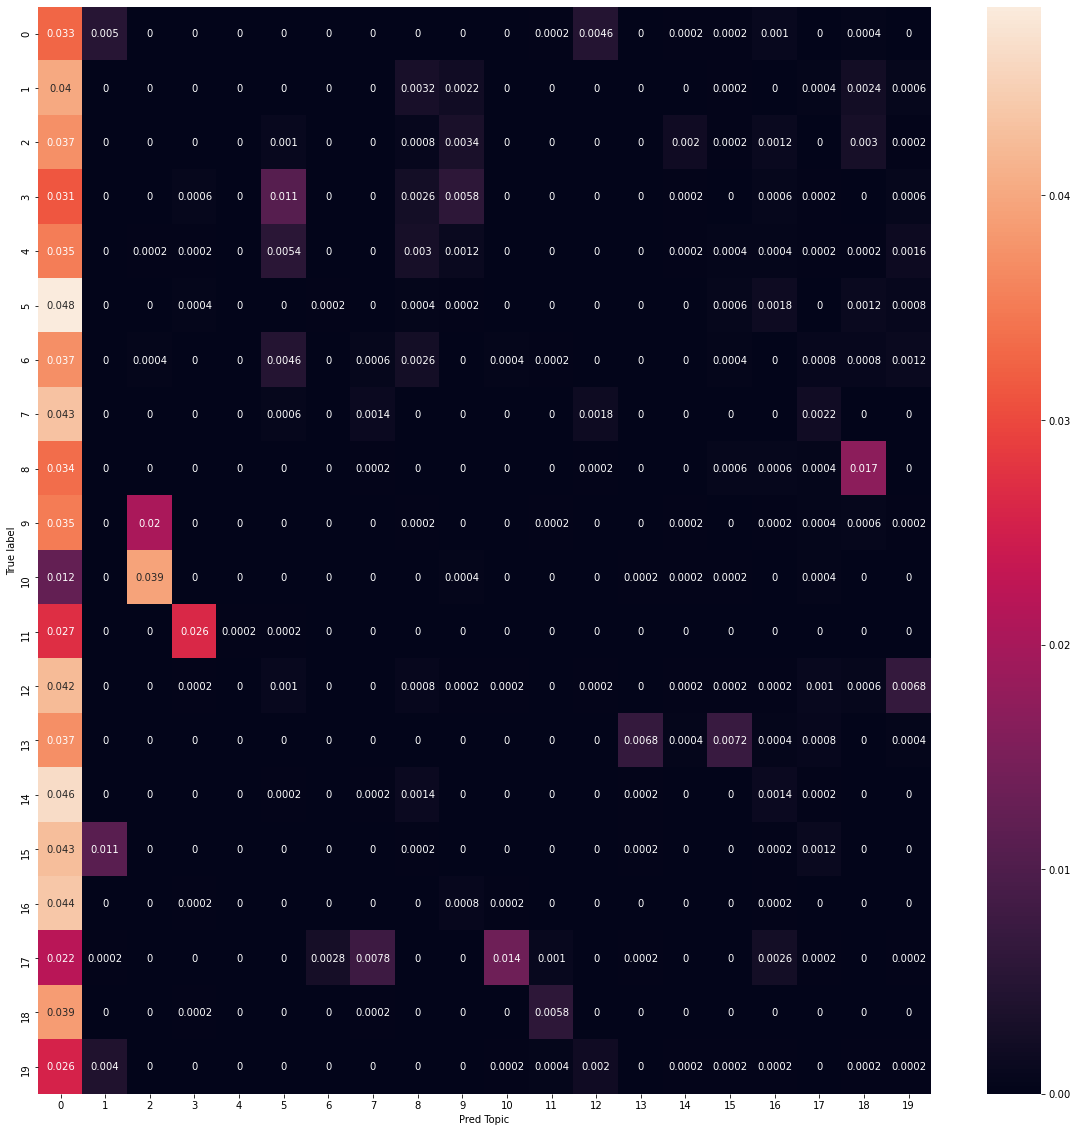